# **ML ASSIGNMENT 1 - EXPLORATORY DATA ANALYSIS**

**1.** Install Anaconda distribution for Python which is free and open source on your local computer (PC or Laptop). Go to the
Navigator and launch a Jupyter Notebook as we discussed in the class. Can alternatively utilize Google Colab for performing
the tasks mentioned.

**2.** Import pandas library for dealing with the data. Read data from the data.csv (given here in this assignment) containing
housing price data into a Panda’s DataFrame. Display how many rows are there in the file and its contents.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/housing.csv")

In [6]:
print(f"Number of rows is {len(data)}")

Number of rows is 20640


**3.** Display descriptive statistics by normally including those stats that summarize the central tendency, dispersion and shape of
a dataset’s distribution. Generate descriptive statistics using describe method on the pandas DataFrame. Display stats like
mean, median and standard deviation.

In [7]:
desc_stats = data.describe()
desc_stats.loc['median'] = data.median(numeric_only=True)
desc_stats = desc_stats.transpose()
print("Descriptive statistics:")
print(desc_stats)


Descriptive statistics:
                      count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  \
longitude             -121.8000    -118.4900    -118.01000    -114.3100   
latitude                33.9300      34.2600      37.71000      41.9500   
housing_median_age  

**4.** Develop a Python code snippet that effectively visualizes the descriptive statistics of a given DataFrame. This should include
(min, max, mean, median, standard deviation).

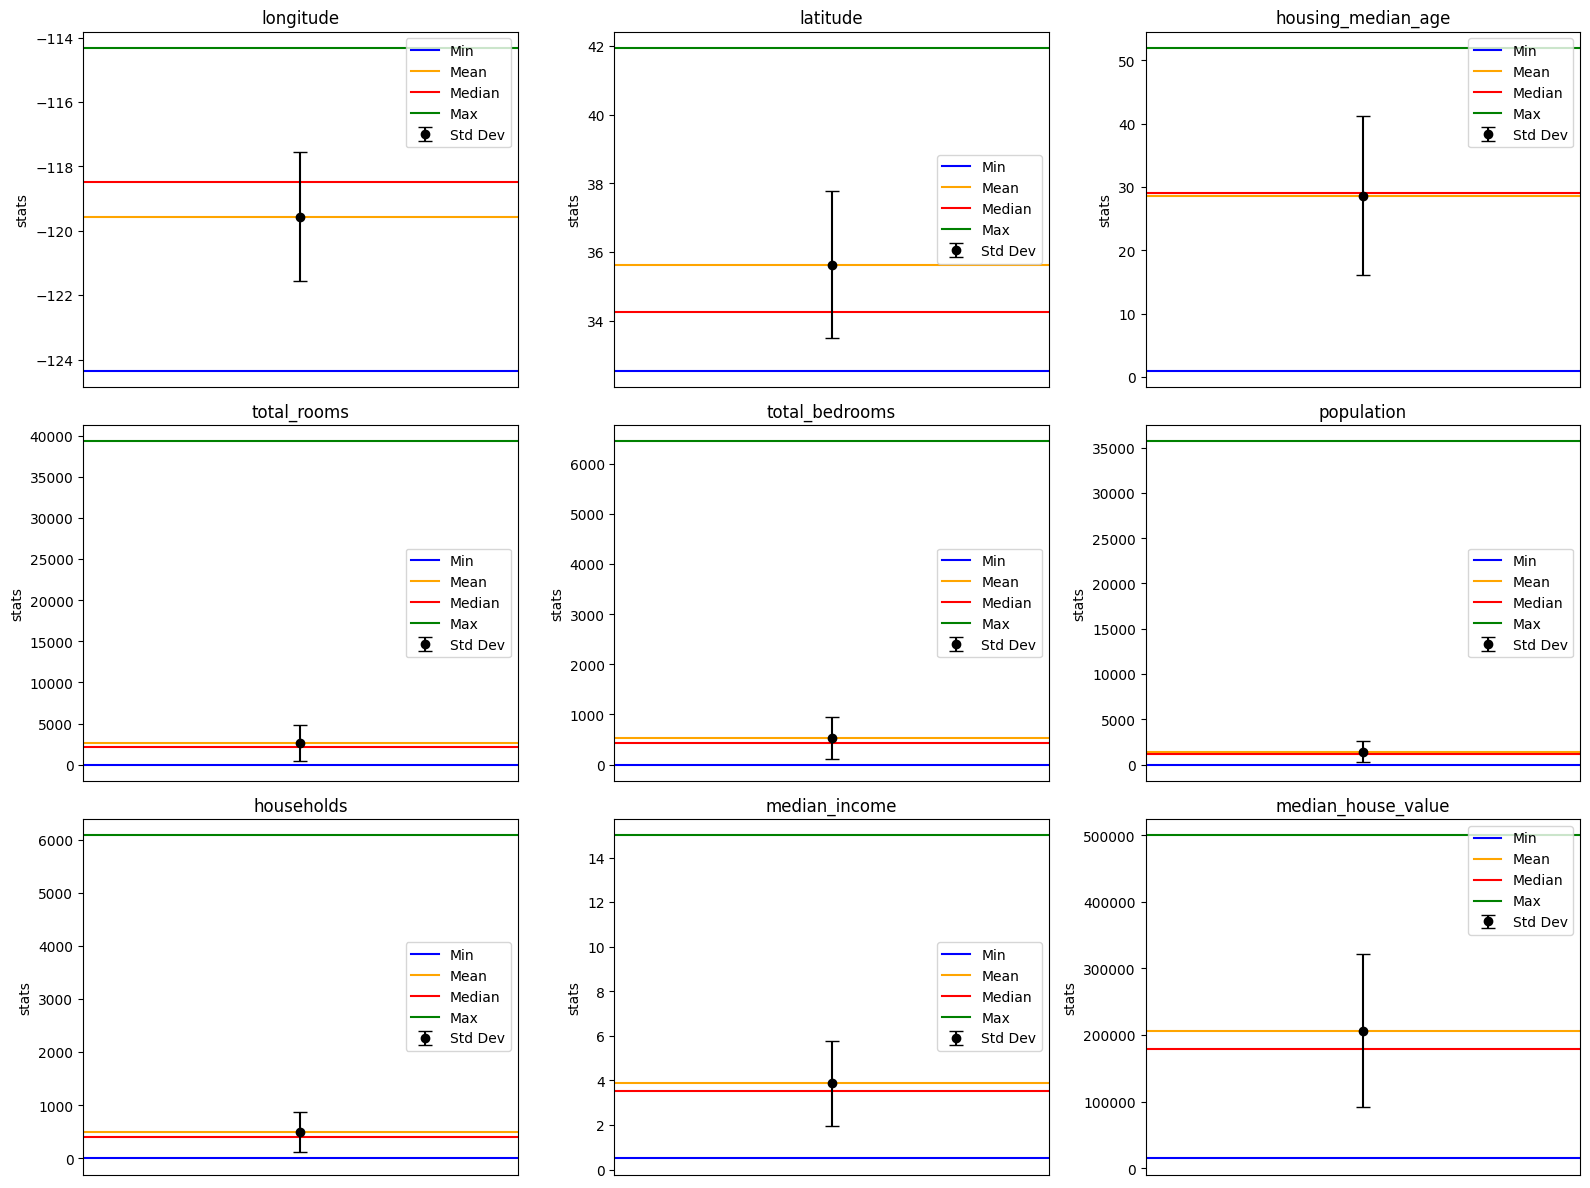

In [8]:
plt.figure(figsize=(16, 12))


n_features = len(desc_stats)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

for i, feature in enumerate(desc_stats.index):
    plt.subplot(n_rows, n_cols, i + 1)


    mean = desc_stats.loc[feature, 'mean']
    median = desc_stats.loc[feature, 'median']
    min_val = desc_stats.loc[feature, 'min']
    max_val = desc_stats.loc[feature, 'max']
    std = desc_stats.loc[feature, 'std']


    plt.axhline(y=min_val, color='blue', linestyle='-', label='Min')
    plt.axhline(y=mean, color='orange', linestyle='-', label='Mean')
    plt.axhline(y=median, color='red', linestyle='-', label='Median')
    plt.axhline(y=max_val, color='green', linestyle='-', label='Max')


    plt.errorbar(x=[0], y=[mean], yerr=[std], fmt='o', color='black', capsize=5, label='Std Dev')
    #The ends of the errorbar are 1 standard deviation away from the mean
    #The center dot of the errorbar lies on the mean line
    plt.title(feature)
    plt.ylabel('stats')
    plt.legend()
    plt.xlim(-0.5, 0.5)
    plt.gca().set_xticks([])


plt.tight_layout()
plt.show()


**5.**  Find out the columns which have the missing values present in them and also identify the number of tuples which have these
missing values. Instead of removing these rows that have missing values in the given CSV file, impute Median of the values
of the respective columns by calling the median method on the respective attributes of the DataFrame. You could also impute
with mean or mode if you so wish.

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_selector

#Column Transformer is used to make a cleaner that can apply different strategies of cleaning for different columns

In [10]:
for index,column in enumerate(data.columns):
  print(f"Column {column} has {data[column].isnull().sum()} missing values ")

Column longitude has 0 missing values 
Column latitude has 0 missing values 
Column housing_median_age has 0 missing values 
Column total_rooms has 0 missing values 
Column total_bedrooms has 207 missing values 
Column population has 0 missing values 
Column households has 0 missing values 
Column median_income has 0 missing values 
Column median_house_value has 0 missing values 
Column ocean_proximity has 0 missing values 


In [11]:
numerical_cleaner = SimpleImputer(strategy = 'median')# median for numerical variables
categorical_cleaner = SimpleImputer(strategy = 'most_frequent') # mode for categorical variables



In [12]:
cleaner = ColumnTransformer([
    ('numerical_transformer' , numerical_cleaner, make_column_selector(dtype_exclude = ['object','category','bool'])),
    ('categorical_transformer', categorical_cleaner, make_column_selector(dtype_include = ['object','category','bool']))
])

In [13]:
#cleaner.fit_transform(data)

In [14]:
print(data['total_bedrooms'].isnull().sum())

207


**6.** To better understand the importance of imputing the mean/median/mode values to the given DataFrame, Plot the
distribution of the columns which have this missing values before and after filling in the missing values. (Try creating a
function for doing the task)

Here though, only total_bedrooms column has missing values.

Number of empty cells before imputation = 207
Number of empty cells after imputation = 0
Before and After Imputation:


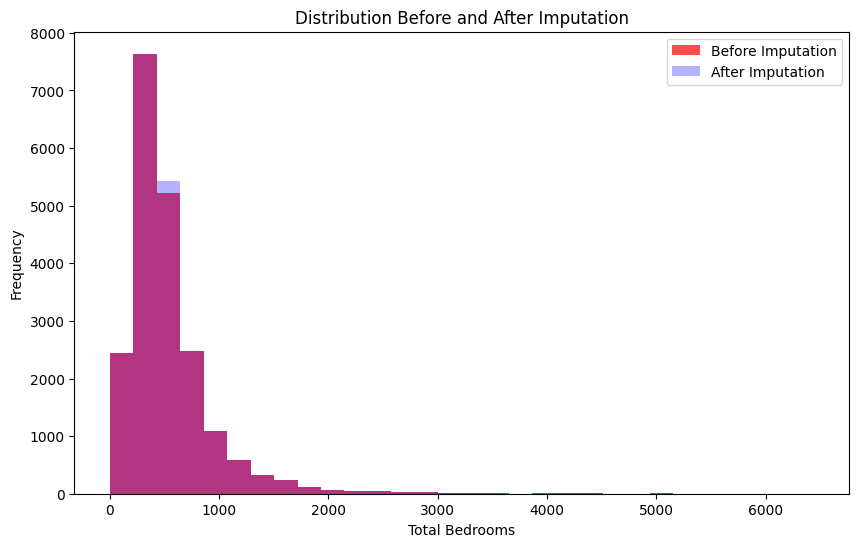

In [15]:
def plotting(before_col, after_col):
    plt.figure(figsize=(10, 6))

    plt.hist(before_col.dropna(), bins=30, alpha=0.7, label='Before Imputation', color='red')
    plt.hist(after_col, bins=30, alpha=0.3, label='After Imputation', color='blue')

    plt.xlabel('Total Bedrooms')
    plt.ylabel('Frequency')
    plt.title('Distribution Before and After Imputation')
    plt.legend()

# Get the column before imputation
before_imputation = data['total_bedrooms'].copy()
print(f'Number of empty cells before imputation = {data["total_bedrooms"].isnull().sum()}')

# Impute missing values with the median of each column
data = data.fillna(data.median(numeric_only=True),inplace=False)

# Get the column after imputation
after_imputation = data['total_bedrooms']
print(f'Number of empty cells after imputation = {data["total_bedrooms"].isnull().sum()}')
print('Before and After Imputation:')
plotting(before_imputation, after_imputation)

**7.** Some rows in the CSV file might have duplicates. If so, remove those duplicates by calling drop_duplicates method on the
DataFrame.

In [16]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {num_duplicates}")
data = data.drop_duplicates()
#data.to_csv('housing.csv', index=False)
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {num_duplicates}")

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0


**8.** Use Matplotlib to create a Python code snippet to generate a scatter plot visualizing the relationship between longitude and
latitude, with the color of each data point representing the corresponding median house value.

Text(0.5, 1.0, 'Distribution of Median House Values')

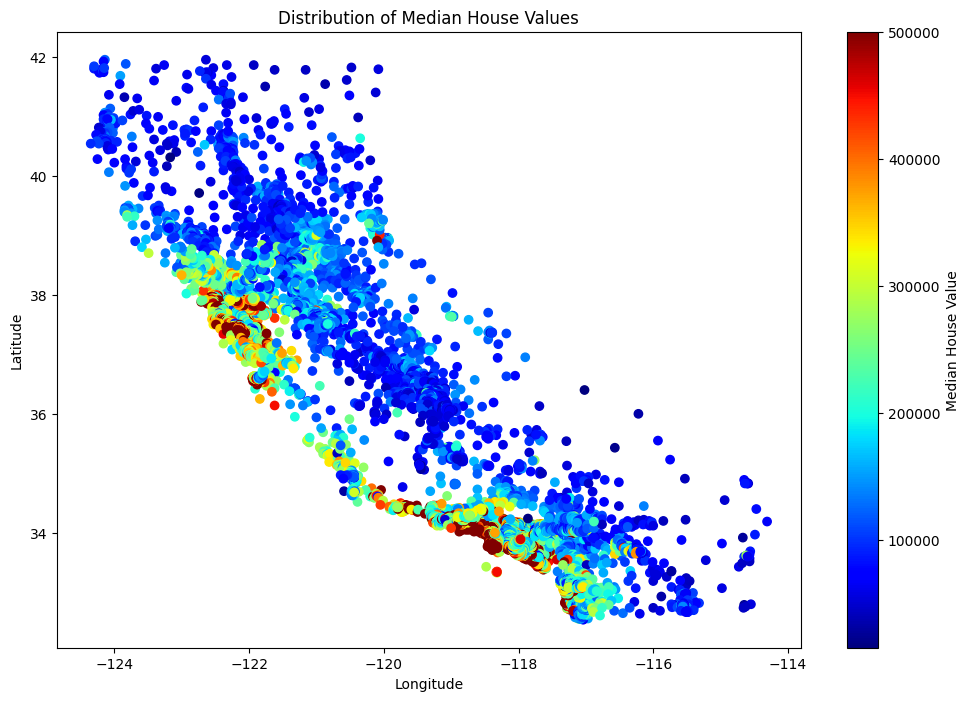

In [17]:
plt.figure(figsize=(12, 8))

# Create a scatter plot
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='jet')

# Add a colorbar to the plot
plt.colorbar(scatter, label='Median House Value')

# Label the axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a title to the plot
plt.title('Distribution of Median House Values')

**9.** Now try making out some observations out of specific columns in the DataFrame and plot them either in form of numerical
observations or as a plot showing the observations you made. (Ex: Plot of number of houses having total Bedrooms less than
1500, median income more than 10, etc.)

Locations here mean a particular longitude and latitude
1.   Locations which are near the ocean
2.   Locations with houses whose median age is greater than 30 years
3.   Locations with population greater than 1000


In [18]:
print("Locations which are near the ocean:", data[data['ocean_proximity'] == 'NEAR BAY'].shape[0])
print("Locations with houses whose median age is greater than 30 years:", data[data['housing_median_age'] > 30].shape[0])
print("Locations with population greater than 1000:", data[data['population'] > 1000].shape[0])


Locations which are near the ocean: 2290
Locations with houses whose median age is greater than 30 years: 9495
Locations with population greater than 1000: 12483


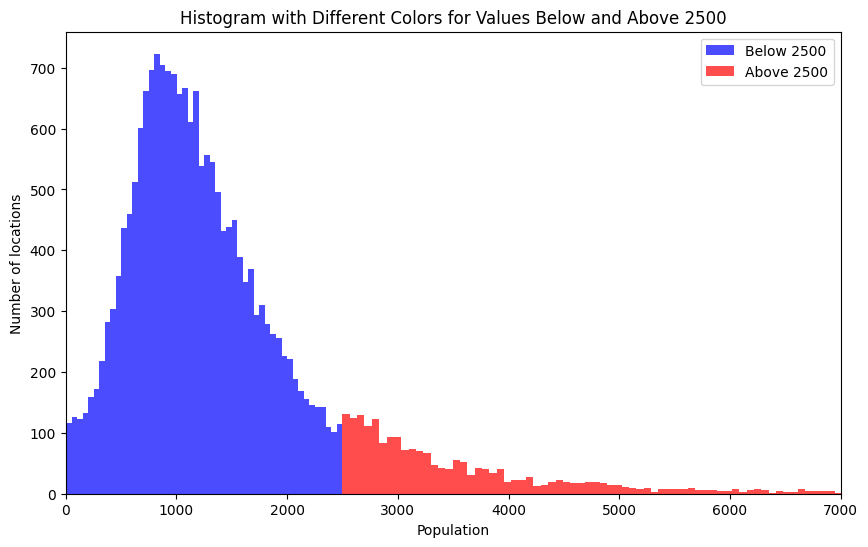

In [39]:
plt.figure(figsize = (10,6))
threshold = 2500

# Separate data into below and above the threshold
below_threshold = data['population'][data['population'] < threshold]
above_threshold = data['population'][data['population'] >= threshold]

# Plot the histogram for values below the threshold
plt.hist(below_threshold, bins=50, alpha=0.7, label='Below 2500', color='blue')

# Plot the histogram for values above the threshold
plt.hist(above_threshold, bins=500, alpha=0.7, label='Above 2500', color='red')

plt.xlim(0, 7000)
# Add labels, title, and legend
plt.xlabel('Population')
plt.ylabel('Number of locations')
plt.title('Histogram with Different Colors for Values Below and Above 2500')
plt.legend()

# Show the plot
plt.show()

**10.** Analyze the relationship between ocean_proximity and other numerical features within the DataFrame. Perform exploratory
data analysis by (on subgroups):
1. Grouping the data by ocean_proximity and calculating summary statistics for each group.
2. Visualizing the distribution of a target variable (e.g., median_house_value) across different ocean_proximity
categories.
3. Consider encoding categorical ocean_proximity values into numerical representations for potential modeling
purposes.

In [20]:
grouped_data = data.groupby('ocean_proximity').agg({
    'population': ['mean', 'sum', 'std','median'],
    'median_house_value': ['mean', 'sum', 'std','median'],
    'households': ['mean', 'sum', 'std','median'],
    'longitude': ['mean', 'sum', 'std','median'],
    'latitude': ['mean', 'sum', 'std','median'],
    'total_bedrooms': ['mean', 'sum', 'std','median'],
    'total_rooms': ['mean', 'sum', 'std','median'],
    'median_income': ['mean', 'sum', 'std','median'],
    'housing_median_age': ['mean', 'sum', 'std','median'],

})
print(grouped_data.to_string())

                  population                                median_house_value                                       households                               longitude                                  latitude                             total_bedrooms                                total_rooms                                median_income                                housing_median_age                          
                        mean       sum          std  median               mean         sum            std    median        mean      sum         std median        mean         sum       std   median       mean        sum       std median           mean        sum         std median         mean       sum          std  median          mean         sum       std   median               mean     sum        std median
ocean_proximity                                                                                                                                                       

<ipython-input-21-d2eab5971e64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['ocean_proximity'], y=data['population'] ,palette='viridis', errorbar=None)


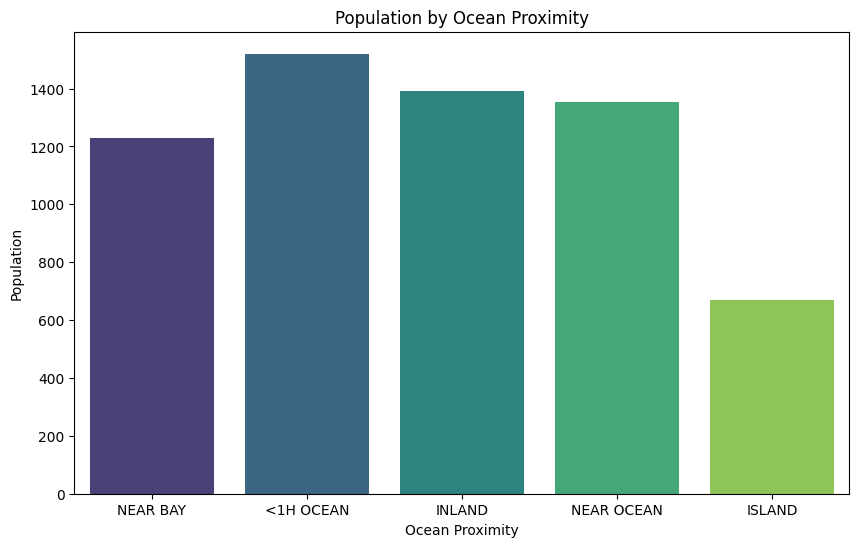

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['ocean_proximity'], y=data['population'] ,palette='viridis', errorbar=None)

# Add title and labels
plt.title('Population by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')

# Show the plot
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
ocean_proximity_le = LabelEncoder()

ocean_proximity_le.fit(data['ocean_proximity'])

print("Classes and their corresponding values:")
for i, class_label in enumerate(ocean_proximity_le.classes_):
    print(f"{class_label}: {i}")

data['ocean_proximity'] = ocean_proximity_le.transform(data['ocean_proximity'])

Classes and their corresponding values:
<1H OCEAN: 0
INLAND: 1
ISLAND: 2
NEAR BAY: 3
NEAR OCEAN: 4


**11.** After performing the label encoding of the ocean_proximity feature: -

a) Create a correlation heatmap of the dataset to identify relationships between numerical features.

b) Generate box plots for all numerical features to visualize their distribution and potential outliers.

c) Analyze the heatmap and box plots for all the features to draw insights about the dataset, such as:

i) Strong correlations between features

ii) Presence of outliers in the numerical data

iii) Potential feature importance based on their distribution

d) Identify and visualize characteristics of premium houses based on ocean proximity, cost per square foot, and median
income. (Plot a Box-Plot for doing so)

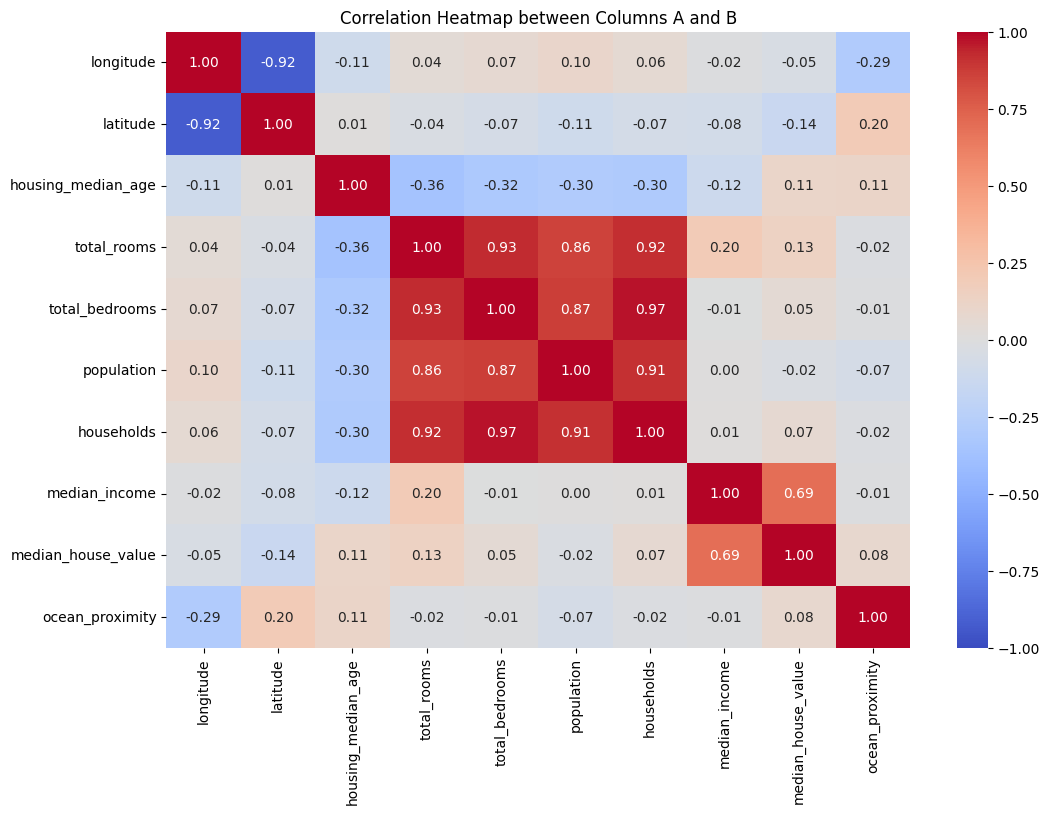

In [23]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create and display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Columns A and B')
plt.show()

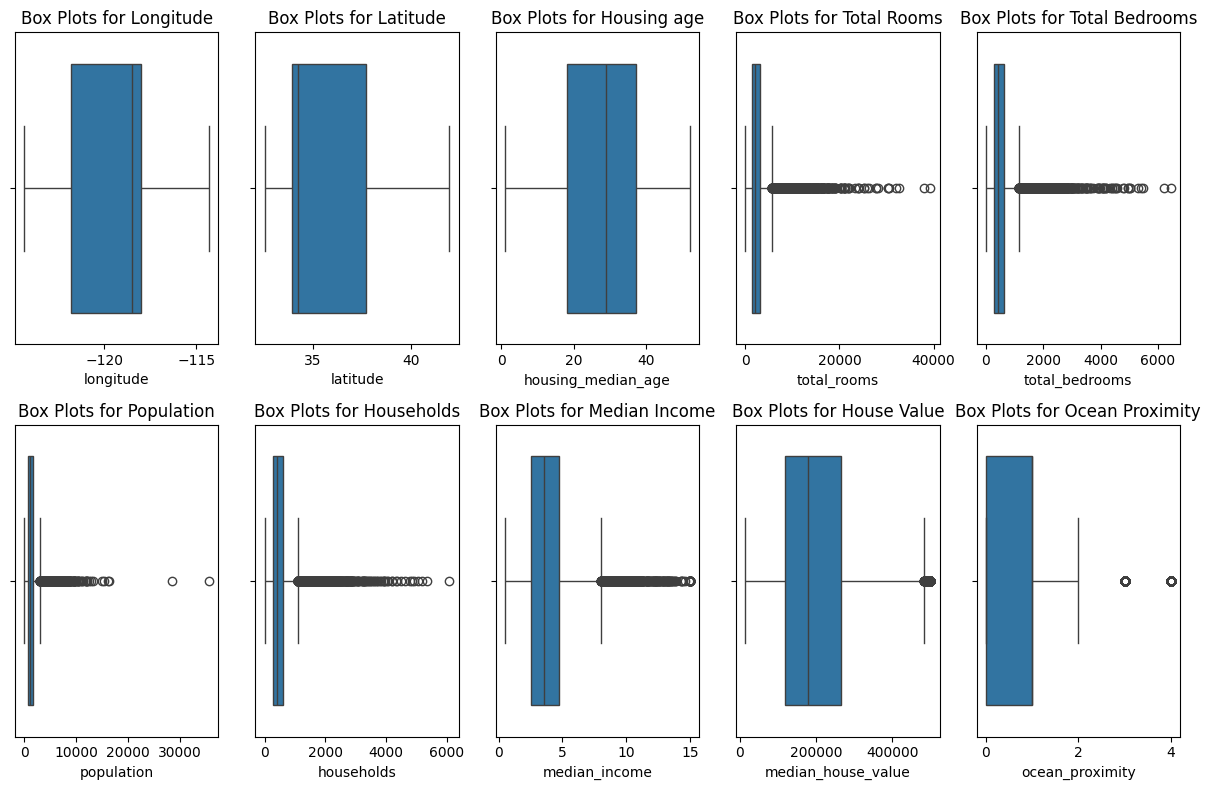

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(2,5,1)
sns.boxplot(data['longitude'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Longitude')
plt.subplot(2,5,2)
sns.boxplot(data['latitude'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Latitude')
plt.subplot(2,5,3)
sns.boxplot(data['housing_median_age'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Housing age')
plt.subplot(2,5,4)
sns.boxplot(data['total_rooms'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Total Rooms')
plt.subplot(2,5,5)
sns.boxplot(data['total_bedrooms'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Total Bedrooms')
plt.subplot(2,5,6)
sns.boxplot(data['population'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Population')
plt.subplot(2,5,7)
sns.boxplot(data['households'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Households')
plt.subplot(2,5,8)
sns.boxplot(data['median_income'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Median Income')
plt.subplot(2,5,9)
sns.boxplot(data['median_house_value'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for House Value')
plt.subplot(2,5,10)
sns.boxplot(data['ocean_proximity'], orient='h')  # 'h' for horizontal, 'v' for vertical
plt.title('Box Plots for Ocean Proximity')
plt.tight_layout()
plt.show()

In [25]:
print('Strong correlations between features:- ')
correlation_matrix = data.corr()
high_corr_pairs = [(i, j) for i in correlation_matrix.columns
                    for j in correlation_matrix.columns
                    if i != j and abs(correlation_matrix.loc[i,j])>0.8]
for pair in high_corr_pairs:
    print(pair)

Strong correlations between features:- 
('longitude', 'latitude')
('latitude', 'longitude')
('total_rooms', 'total_bedrooms')
('total_rooms', 'population')
('total_rooms', 'households')
('total_bedrooms', 'total_rooms')
('total_bedrooms', 'population')
('total_bedrooms', 'households')
('population', 'total_rooms')
('population', 'total_bedrooms')
('population', 'households')
('households', 'total_rooms')
('households', 'total_bedrooms')
('households', 'population')


In [26]:
for feature in data.columns:
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1

  # Define thresholds for identifying outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

  print(f"Outliers according to {feature}'s box plot")
  print(outliers[feature].count())

Outliers according to longitude's box plot
0
Outliers according to latitude's box plot
0
Outliers according to housing_median_age's box plot
0
Outliers according to total_rooms's box plot
1287
Outliers according to total_bedrooms's box plot
1306
Outliers according to population's box plot
1196
Outliers according to households's box plot
1220
Outliers according to median_income's box plot
681
Outliers according to median_house_value's box plot
1071
Outliers according to ocean_proximity's box plot
4948


In [27]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
0,9136
1,6551
4,2658
3,2290
2,5


For the outliers according to ocean proximity, we cannot use the quartile formula as ocean proximity has only 5 possible values,labelled as 0,1,2,3,4. Due to this all values which are 3 and 4 are being labelled as outliers.

<ipython-input-28-d514d263cacc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_houses['cost_per_sq_feet'] = premium_houses['median_house_value']/premium_houses['total_rooms']


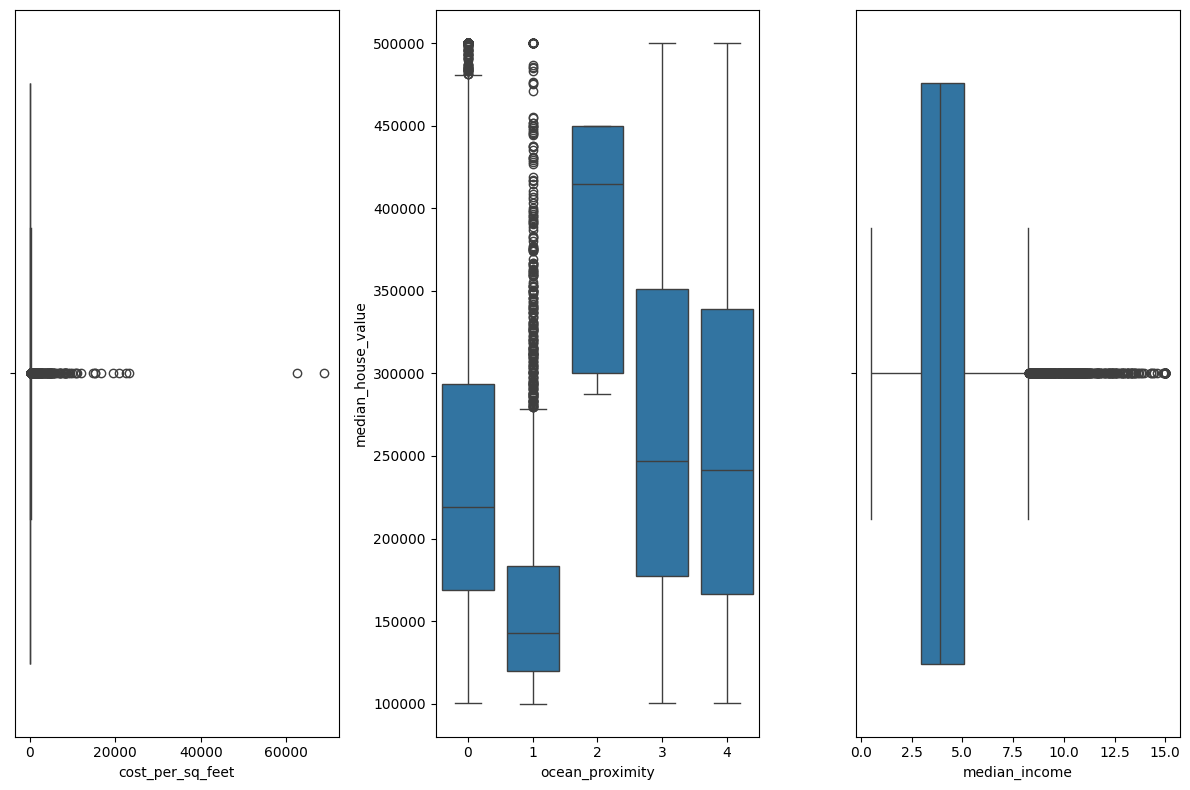

In [28]:
premium_houses = data[data['median_house_value']>100000]
premium_houses['cost_per_sq_feet'] = premium_houses['median_house_value']/premium_houses['total_rooms']
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.boxplot(premium_houses['cost_per_sq_feet'], orient='h')
plt.subplot(1,3,2)
sns.boxplot(x='ocean_proximity', y='median_house_value',data=premium_houses, orient='v')
plt.subplot(1,3,3)
sns.boxplot(premium_houses['median_income'], orient='h')
plt.tight_layout()
plt.show()

 **12.** Develop a Python function to visualize the distribution and relationship of a specified numerical column within a dataset. Create a figure with three subplots: Plot the Kernel Density Estimate (KDE) of the column in the first subplot, plot a boxplot of the column in the second subplot, and plot a scatterplot of the column against 'median_house_value' in the third subplot. Present the plots in a clear and informative manner.

In [29]:
def analyze_column(data,column_name):
  plt.figure(figsize=(18,6))

  #KDE PLOT
  plt.subplot(1,3,1)
  plt.title(f'KDE of {column_name}')
  sns.kdeplot(data[column_name].dropna(),fill = True,color = 'blue',label = f'KDE of {column_name}')

  #BOX PLOT
  plt.subplot(1,3,2)
  plt.title(f'Box plot of {column_name}')
  sns.boxplot(data = data,x=column_name,color = 'orange')

  #SCATTER PLOT
  plt.subplot(1,3,3)
  plt.title(f'Scatter plot of {column_name}')
  sns.scatterplot(x=column_name,y='median_house_value',data = data,alpha = 0.5)

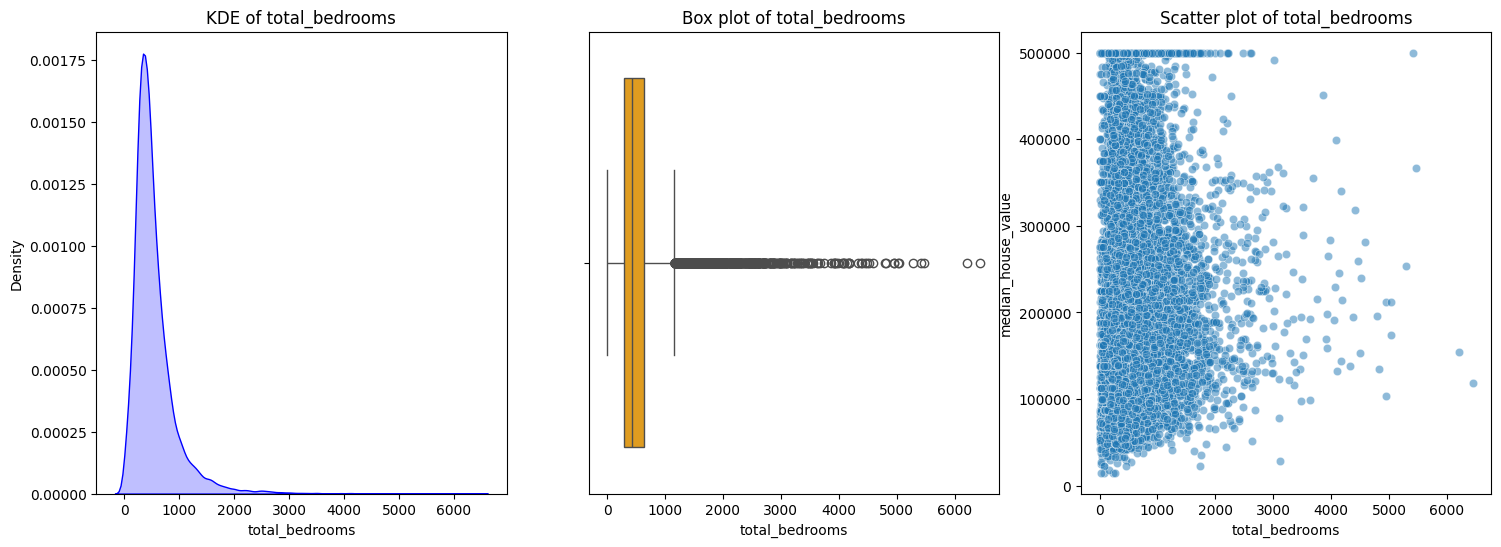

In [30]:
#Running the above function on the total_bedrooms column as an example
analyze_column(data,'total_bedrooms')

**13.** Identify and visualize outliers in a numerical column of a dataset based on standard deviation. Assuming a normal distribution, calculate the lower and upper bounds for data points within approximately 95% of
the data using two standard deviations from the mean. Identify data points that fall outside these bounds as outliers. Calculate the total number of outliers. Visually represent the data distribution, highlighting the outlier regions.

In [31]:
def visualise_outliers(data,column_name):
  mean = data[column_name].mean()
  std_dev = data[column_name].std()

  lower_bound = mean - 2*std_dev
  upper_bound = mean + 2*std_dev

  outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

  num_outliers = outliers.shape[0]

  print(f"Number of outliers in {column_name} is : {num_outliers}")

  plt.figure(figsize=(12,6))
  plt.title(f'Data distribution showing outliers of {column_name}')
  plt.hist(data[column_name],bins=50,alpha = 0.6,color='blue',edgecolor = 'black')

  plt.axvspan(data[column_name].min(),lower_bound,color='red',alpha = 0.4,label = 'Outliers')
  plt.axvspan(upper_bound,data[column_name].max(),color='red',alpha = 0.4,label = 'Outliers')

Number of outliers in median_house_value is : 1383


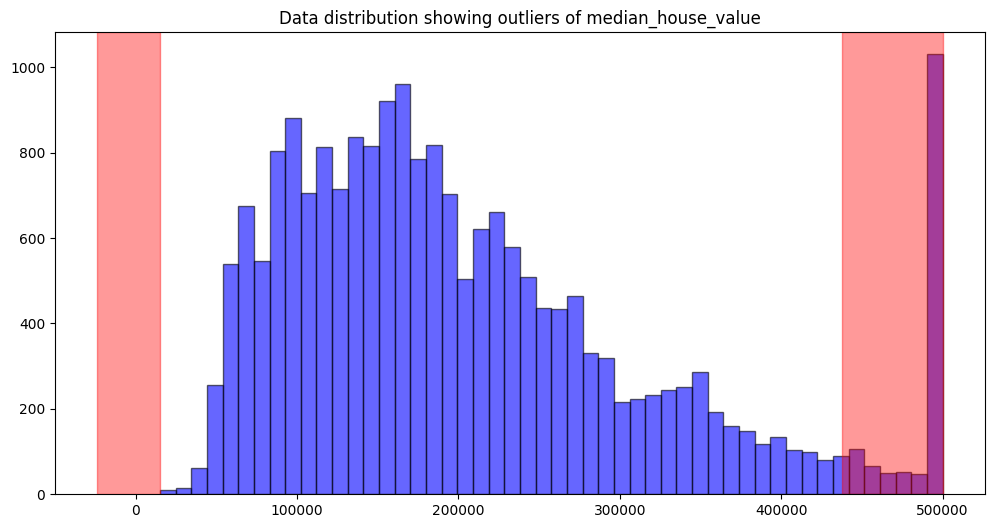

In [32]:
#Running the above function on the median_house_value column as an example
visualise_outliers(data,'median_house_value')

The red shaded regions on the extreme left and right side are the outliers.

**14.** Perform feature scaling on the given DataFrame using StandardScaler and MinMaxScaler from Scikit-learn.
Apply both scaling techniques to the numerical features of the DataFrame.
Compare the resulting ranges of the scaled data for both methods.
Explore the potential benefits and drawbacks of each scaling technique in the context of the given dataset. (Just
know what each scaling technique actually does and how are they different from one another)
Investigate additional scaling methods commonly employed in practice, such as RobustScaler, QuantileScaler, and
PowerTransformer.
Justify and analyze the selection of these alternative scaling methods based on their theoretical underpinnings and
potential advantages over StandardScaler and MinMaxScaler.

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
x = data
y = data

x = StandardScaler().fit_transform(x)
for i in x:
  min_values = np.min(x, axis=0)
  max_values = np.max(x, axis=0)
  max_ss = max_values
  min_ss = min_values

y = MinMaxScaler().fit_transform(y)
for i in y:
  min_values = np.min(y, axis=0)
  max_values = np.max(y, axis=0)
  max_mm = max_values
  min_mm = min_values

for i,j in enumerate(data.columns):
  print(f'Ranges of {j} are  ({min_ss[i]},{max_ss[i]}) for StandardScaler and ({min_mm[i]},{max_mm[i]}) for MinMaxScaler')

Ranges of longitude are  (-2.3859923416733877,2.625280057018667) for StandardScaler and (0.0,1.0) for MinMaxScaler
Ranges of latitude are  (-1.4475679983577021,2.9580676211031918) for StandardScaler and (0.0,1.0) for MinMaxScaler
Ranges of housing_median_age are  (-2.1961804849268263,1.8561815225324745) for StandardScaler and (0.0,0.9999999999999999) for MinMaxScaler
Ranges of total_rooms are  (-1.2072829451495584,16.815579920800463) for StandardScaler and (0.0,0.9999999999999999) for MinMaxScaler
Ranges of total_bedrooms are  (-1.2776876851042855,14.087788971854474) for StandardScaler and (0.0,0.9999999999999999) for MinMaxScaler
Ranges of population are  (-1.2561225469018058,30.250330218731502) for StandardScaler and (0.0,1.0) for MinMaxScaler
Ranges of households are  (-1.3039836790262453,14.601520068357802) for StandardScaler and (0.0,1.0) for MinMaxScaler
Ranges of median_income are  (-1.7742994673175232,5.858285811780286) for StandardScaler and (0.0,1.0) for MinMaxScaler
Ranges o

As expected, in case of MinMaxScaler, the  range is from 0 to 1 as values are calculated by (x- min)/(max - min) so min value can be 0 and max value can be 1.

In case of StandardScaler though, the values can be negative as well because the formula is (x - s.d)/mean.

# Exploring other scaling methods

1) Robust Scaler - subtracts median value and divides interquartile range, i.e. difference between 75th percentile and 25th percentile.
Generally used when there are too many outliers in the dataset

In [34]:
from sklearn.preprocessing import RobustScaler

u = data
u = RobustScaler().fit_transform(u)

for i in u:
  min_values = np.min(u, axis=0)
  max_values = np.max(u, axis=0)
  max_rb = max_values
  min_rb = min_values

for i,j in enumerate(data.columns):
  print(f'Ranges of {j} are  ({min_rb[i]},{max_rb[i]}) for RobustScaler')

Ranges of longitude are  (-1.5461741424802142,1.1029023746701851) for RobustScaler
Ranges of latitude are  (-0.4550264550264546,2.034391534391535) for RobustScaler
Ranges of housing_median_age are  (-1.4736842105263157,1.2105263157894737) for RobustScaler
Ranges of total_rooms are  (-1.2498162034994853,21.87501837965005) for RobustScaler
Ranges of total_bedrooms are  (-1.2534296028880867,17.357400722021662) for RobustScaler
Ranges of population are  (-1.2398720682302773,36.79744136460555) for RobustScaler
Ranges of households are  (-1.2553846153846153,17.455384615384617) for RobustScaler
Ranges of median_income are  (-1.392251760442232,5.259673830768172) for RobustScaler
Ranges of median_house_value are  (-1.1348906115417743,2.2070697674418605) for RobustScaler
Ranges of ocean_proximity are  (-1.0,3.0) for RobustScaler


2) PowerTransformer - Power transforms are useful when a feature has very high skewness. Using power transform, we make such a feature more symmetric like a normal distribution. It applies a power transformation to make the data more normally distributed.

<Axes: >

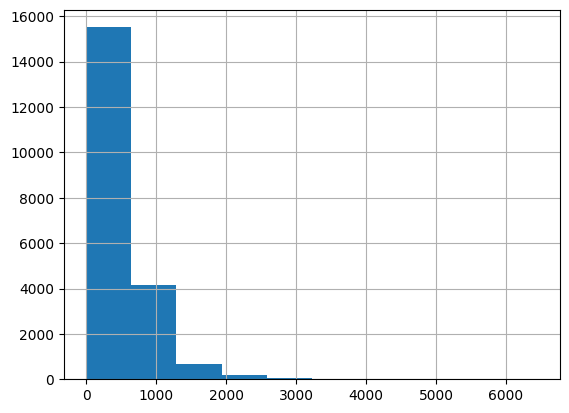

In [35]:
from sklearn.preprocessing import PowerTransformer
v = data
v['total_bedrooms'].hist()

Clearly this feature's distribution is not symmetrical which can be problematic for some ML algorithms. Power Transformer can be used to fix this. There are two methods of power transformations, yeo-johnson and box-cox, which follow two different formulae to carry out the transformation.

(array([  64.,  188.,  581., 3482., 9442., 5092., 1379.,  322.,   73.,
          17.]),
 array([-4.61509438, -3.62925076, -2.64340714, -1.65756351, -0.67171989,
         0.31412373,  1.29996736,  2.28581098,  3.2716546 ,  4.25749822,
         5.24334185]),
 <BarContainer object of 10 artists>)

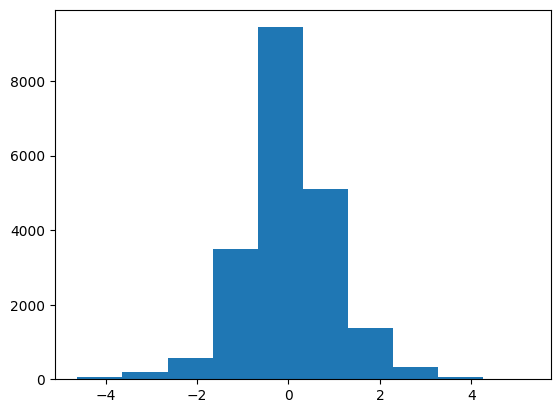

In [36]:
power = PowerTransformer('yeo-johnson')
t = power.fit_transform(v)
plt.hist(t[:,4])

Box-cox method can be applied when values are positive only

3) QuantileTransformer

In [37]:
from sklearn.preprocessing import QuantileTransformer
w = data
transformer = QuantileTransformer(n_quantiles = 100,output_distribution='uniform', random_state=0)

w = transformer.fit_transform(w)

for i in w:
  min_values = np.min(u, axis=0)
  max_values = np.max(u, axis=0)
  max_q = max_values
  min_q = min_values
for i,j in enumerate(data.columns):
  print(f'Ranges of {j} are  ({min_q[i]},{max_q[i]}) for QuantileScaler')

Ranges of longitude are  (-1.5461741424802142,1.1029023746701851) for QuantileScaler
Ranges of latitude are  (-0.4550264550264546,2.034391534391535) for QuantileScaler
Ranges of housing_median_age are  (-1.4736842105263157,1.2105263157894737) for QuantileScaler
Ranges of total_rooms are  (-1.2498162034994853,21.87501837965005) for QuantileScaler
Ranges of total_bedrooms are  (-1.2534296028880867,17.357400722021662) for QuantileScaler
Ranges of population are  (-1.2398720682302773,36.79744136460555) for QuantileScaler
Ranges of households are  (-1.2553846153846153,17.455384615384617) for QuantileScaler
Ranges of median_income are  (-1.392251760442232,5.259673830768172) for QuantileScaler
Ranges of median_house_value are  (-1.1348906115417743,2.2070697674418605) for QuantileScaler
Ranges of ocean_proximity are  (-1.0,3.0) for QuantileScaler


Overall all these methods have their own advantages and disadvantages.
RobustScaler and QuantileScaler are better when we are aware of the presence of a good number of outliers in our dataset.

StandardScaler and MinMaxScalers are sensitive to outliers but have the advantages of being simpler and also minmaxscaler scales data to a specified range (usually [0, 1]), preserving the relationships between features while standardscaler transforms data to have a mean of 0 and a standard deviation of 1, which is suitable for many machine learning algorithms.
